<a href="https://colab.research.google.com/github/ahmedelarbirj/TSFin/blob/main/Copy_of_lstm_univari%C3%A9_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
from datetime import date, timedelta, datetime
!pip install yfinance
import yfinance as yf
# Setting the timeframe for the data extraction
end_date =  '2022-08-21'
start_date = '2007-01-01'

# Getting S&P500 quotes
stockname = 'S&P500'
symbol = '^GSPC'

# You can either use webreader or yfinance to load the data from yahoo finance
# import pandas_datareader as webreader
# df = webreader.DataReader(symbol, start=start_date, end=end_date, data_source="yahoo")

dataset = yf.download(symbol, start=start_date, end=end_date)
# Quick overview of dataset
dataset.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000
2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000
2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000
2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000
2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000


In [ ]:
sd = pd.DataFrame(dataset.Close)
print(sd.describe())


             Close
count  3936.000000
mean   2139.187522
std     987.922583
min     676.530029
25%    1348.317505
50%    1961.340027
75%    2746.977600
max    4796.560059


In [ ]:
sd.quantile(.95)

Close    4297.230103
Name: 0.95, dtype: float64

In [ ]:
close_price = dataset['Close'].values.reshape(-1,1)
close_price

array([[1416.59997559],
       [1418.33996582],
       [1409.70996094],
       ...,
       [4274.04003906],
       [4283.74023438],
       [4228.47998047]])

In [ ]:
int(len(close_price) *0.2)

787

In [ ]:
dataset['Close'][-789:]

Date
2019-07-05    2990.409912
2019-07-08    2975.949951
2019-07-09    2979.629883
2019-07-10    2993.070068
2019-07-11    2999.909912
                 ...     
2022-08-15    4297.140137
2022-08-16    4305.200195
2022-08-17    4274.040039
2022-08-18    4283.740234
2022-08-19    4228.479980
Name: Close, Length: 789, dtype: float64

In [ ]:
def create_datasets(dataset, sequence_length):
  sequence_length +=1
  seq_dataset = []
  for i in range(len(dataset)-sequence_length):
    seq_dataset.append(dataset[i: i+ sequence_length])

  seq_dataset = np.array(seq_dataset)
  data_x = seq_dataset[:, :-1]
  data_y = seq_dataset[:, -1]
  return data_x, data_y
scaler= MinMaxScaler(feature_range=(0, 1))
close_price_scaled = scaler.fit_transform(close_price)
train_size = int(len(close_price_scaled) *0.8)
#train_data_len = math.ceil(scaled_data.shape[0] * 0.8)
test_size = len(close_price_scaled)-train_size
train, test = close_price_scaled[0:train_size,:], close_price_scaled[train_size:len(close_price_scaled)]

look_back = 30 # sequence length

x_train, y_train = create_datasets(train,look_back)
x_test, y_test = create_datasets(test,look_back)


In [ ]:
x_train.shape

(3117, 30, 1)

In [ ]:
y_test.shape

(757, 1)

In [ ]:
model = Sequential()

#model.add(LSTM(128,return_sequences=True))
model.add(LSTM(50, input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=False))
model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer = 'adam')

In [ ]:
history= model.fit(x_train,y_train, batch_size=64, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
39/39 - 8s - loss: 0.0054 - val_loss: 0.0014 - 8s/epoch - 201ms/step
Epoch 2/100
39/39 - 3s - loss: 0.0013 - val_loss: 1.2121e-04 - 3s/epoch - 78ms/step
Epoch 3/100
39/39 - 3s - loss: 9.0831e-04 - val_loss: 2.1325e-04 - 3s/epoch - 80ms/step
Epoch 4/100
39/39 - 3s - loss: 8.1851e-04 - val_loss: 1.8951e-04 - 3s/epoch - 79ms/step
Epoch 5/100
39/39 - 3s - loss: 7.0065e-04 - val_loss: 1.6058e-04 - 3s/epoch - 77ms/step
Epoch 6/100
39/39 - 3s - loss: 6.3215e-04 - val_loss: 2.0368e-04 - 3s/epoch - 79ms/step
Epoch 7/100
39/39 - 3s - loss: 6.2443e-04 - val_loss: 1.1002e-04 - 3s/epoch - 83ms/step
Epoch 8/100
39/39 - 3s - loss: 5.7617e-04 - val_loss: 1.0203e-04 - 3s/epoch - 86ms/step
Epoch 9/100
39/39 - 2s - loss: 5.6949e-04 - val_loss: 1.1018e-04 - 2s/epoch - 41ms/step
Epoch 10/100
39/39 - 1s - loss: 5.1680e-04 - val_loss: 9.5586e-05 - 1s/epoch - 37ms/step
Epoch 11/100
39/39 - 1s - loss: 5.2362e-04 - val_loss: 1.0469e-04 - 1s/epoch - 35ms/step
Epoch 12/100
39/39 - 1s - loss: 4.8472e-0

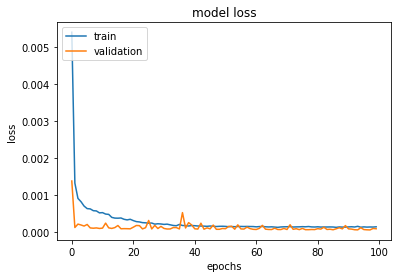

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(3936, 1)


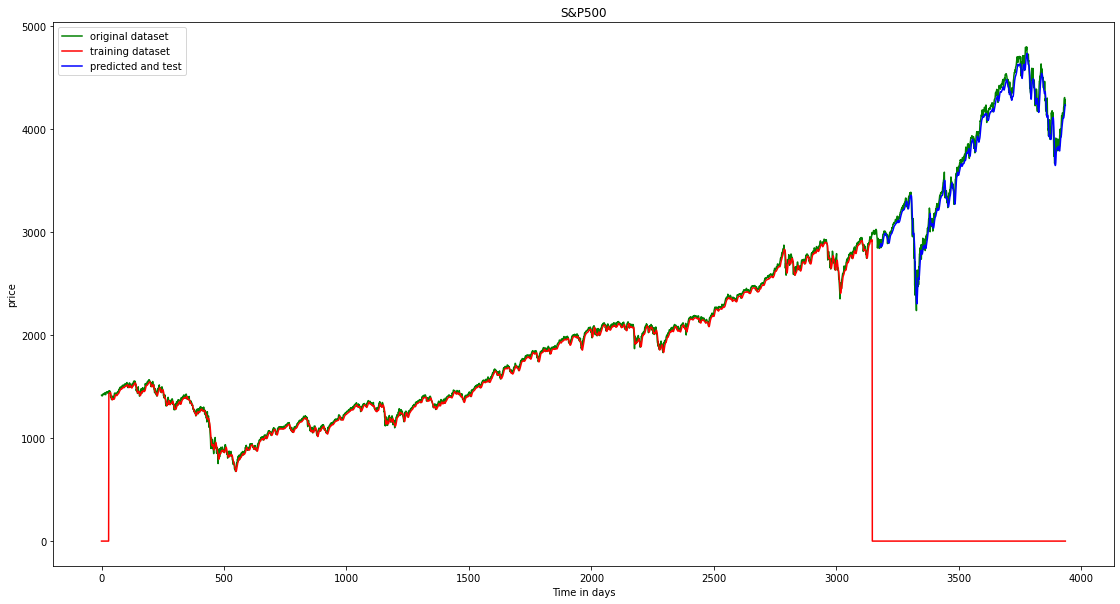

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict_unnorm = scaler.inverse_transform(train_predict)
test_predict_unnorm = scaler.inverse_transform(test_predict)
#creating similar dataset to plot training predictions
trainpredictPlot= np.empty_like(close_price)

print(trainpredictPlot.shape)
trainpredictPlot[look_back:len(train_predict_unnorm)+look_back, :] = train_predict_unnorm


#creating similar dataset to plot test prediction
testpredictPlot = np.empty_like(close_price)
testpredictPlot[:, :] = np.nan 
#testpredictPlot[len(train_predict_unnorm)+(look_back*2)+30:len(close_price)-10, :] = test_predict_unnorm #30=1, 10=1
testpredictPlot[len(train_predict_unnorm)+(look_back*2)+1:len(close_price)-1, :] = test_predict_unnorm #30=1, 10=1

plt.figure(figsize=(19,10))
plt.plot(close_price, 'g', label= 'original dataset')
plt.plot(trainpredictPlot, 'r', label= 'training dataset')
plt.plot(testpredictPlot, 'b', label= 'predicted and test')
plt.legend(loc= 'upper left')
plt.title("S&P500")
plt.xlabel('Time in days')
plt.ylabel('price')
plt.show()

In [ ]:
y_test1=y_test[26:]
test_predict1=test_predict[26:]

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,max_error,r2_score
# Mean Absolute Percentage Error (MAPE)
e1 = mean_absolute_percentage_error(y_test, test_predict)
e2 = mean_squared_error(y_test, test_predict)
e3 = r2_score(y_test, test_predict)
print("MAPE=",e1)
print("MSE=",e2)
print("r2_score=",e3)

MAPE= 0.021458571917790832
MSE= 0.00037252288372194585
r2_score= 0.9831067859273993


In [ ]:
e1 = mean_absolute_percentage_error(y_test1, test_predict1)
e2 = mean_squared_error(y_test1, test_predict1)
e3 = r2_score(y_test1, test_predict1)
print("MAPE=",e1)
print("MSE=",e2)
print("r2_score=",e3)

MAPE= 0.02164162486237775
MSE= 0.00038181849912256546
r2_score= 0.9821734143659795


In [ ]:
y_test.shape

(757, 1)

In [ ]:
def MAPE(y_test, test_predict_unnorm): 
    y_true, y_pred = np.array(y_test), np.array(test_predict)
    return np.mean(np.abs((y_test - test_predict) / y_test)) * 100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mape=np.mean(np.abs(np.array(test_predict[:])-np.array(y_test))/np.abs(y_test))
print('MAPE: '+str(mape))

MAPE: 0.018374000474277175


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
y= pd.DataFrame(test_predict_unnorm)
y.to_excel(excel_writer=r'/content/gdrive/MyDrive/pythonexcel.xlsx')

Mounted at /content/gdrive


In [ ]:
len(test_predict_unnorm)

757

In [ ]:
real_values= dataset['Close'][-757:]
y= pd.DataFrame(real_values)
y.to_excel(excel_writer=r'/content/gdrive/MyDrive/arima.xlsx')